In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [2]:
# Loading CIFAR-10 dataset
(cnn_train_images, cnn_train_labels), (cnn_test_images, cnn_test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
#Data Preprocessing

# Normalizing pixel values between 0 and 1
cnn_train_images = cnn_train_images.astype('float32') / 255
cnn_test_images = cnn_test_images.astype('float32') / 255

# Convert labels to categorical format using one-hot encoding method
cnn_train_labels = tf.keras.utils.to_categorical(cnn_train_labels, 10)
cnn_test_labels = tf.keras.utils.to_categorical(cnn_test_labels, 10)


In [4]:
# Define SimCNN architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(10, activation ='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 64)       2

In [5]:
# Compiling the model
model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(cnn_train_images, cnn_train_labels, epochs = 25, 
                    batch_size = 32, steps_per_epoch = 550, validation_steps = 1,
                    validation_data = (cnn_test_images, cnn_test_labels))

Epoch 1/25
550/550 [==============================] - 166s 299ms/step - loss: 1.6647 - accuracy: 0.4100 - val_loss: 1.5117 - val_accuracy: 0.5000
Epoch 2/25
550/550 [==============================] - 160s 291ms/step - loss: 1.3107 - accuracy: 0.5299 - val_loss: 1.3658 - val_accuracy: 0.5312
Epoch 3/25
550/550 [==============================] - 160s 292ms/step - loss: 1.1577 - accuracy: 0.5902 - val_loss: 1.0980 - val_accuracy: 0.6562
Epoch 4/25
550/550 [==============================] - 159s 290ms/step - loss: 1.0045 - accuracy: 0.6468 - val_loss: 0.8017 - val_accuracy: 0.6875
Epoch 5/25
550/550 [==============================] - 158s 287ms/step - loss: 0.9748 - accuracy: 0.6575 - val_loss: 0.7597 - val_accuracy: 0.7500
Epoch 6/25
550/550 [==============================] - 157s 285ms/step - loss: 0.9194 - accuracy: 0.6741 - val_loss: 0.8023 - val_accuracy: 0.7500
Epoch 7/25
550/550 [==============================] - 157s 285ms/step - loss: 0.8092 - accuracy: 0.7158 - val_loss: 0.8264 -

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(cnn_test_images, cnn_test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 19s - loss: 1.2550 - accuracy: 0.6827 - 19s/epoch - 61ms/step
Test accuracy: 0.682699978351593


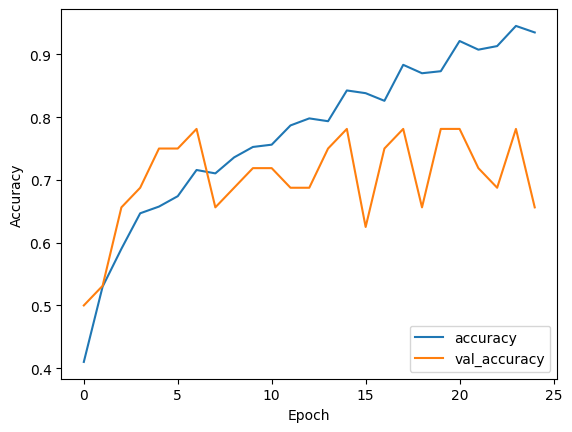

In [8]:
#Visualising the performance

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')
